In [3]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=74152dedf6c948f70a5bfddde23de1f370f953fc2108b1525907ef31b0b1a41c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Initial dataset shape: (1232, 770)
Numeric dataset shape after cleaning: (1232, 770)


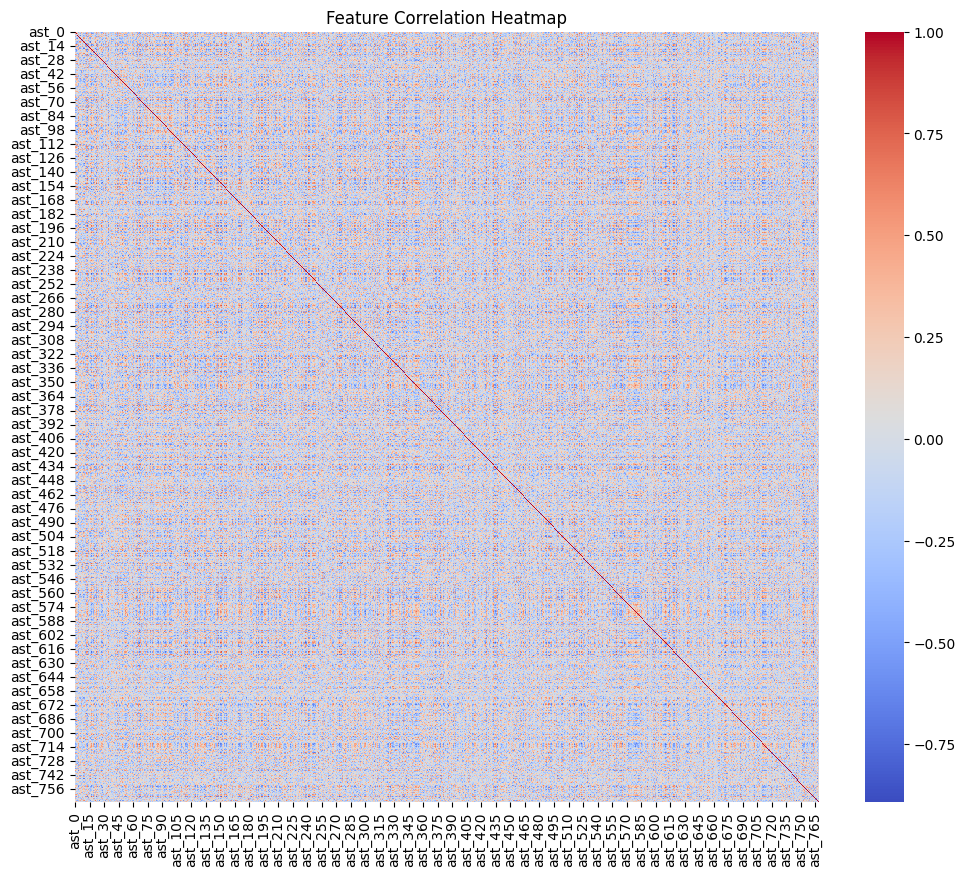

Shape after PCA 99%: (1232, 152)

A2 - PCA 99% Accuracy: 0.5303643724696356
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.66      0.79      0.72        99
           2       0.47      0.62      0.54        74
           3       0.18      0.09      0.12        35
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         6
           6       1.00      0.23      0.38        13
           9       0.00      0.00      0.00         8

    accuracy                           0.53       247
   macro avg       0.41      0.26      0.28       247
weighted avg       0.50      0.53      0.49       247



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Shape after PCA 95%: (1232, 56)

A3 - PCA 95% Accuracy: 0.5748987854251012
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.71      0.81      0.75        99
           2       0.57      0.70      0.63        74
           3       0.16      0.11      0.13        35
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         6
           6       0.83      0.38      0.53        13
           9       0.00      0.00      0.00         8

    accuracy                           0.57       247
   macro avg       0.41      0.29      0.32       247
weighted avg       0.53      0.57      0.54       247



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Feature Reduction and Explainability Analysis
# This notebook performs:
# - Correlation analysis
# - PCA with 99% and 95% explained variance
# - Sequential Feature Selection
# - Model evaluation
# - LIME and SHAP explanations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report, accuracy_score

import shap
import lime
import lime.lime_tabular

# Load dataset
df = pd.read_excel('/content/10-Java_AST_in_.xlsx')
print("Initial dataset shape:", df.shape)

# Drop non-numeric columns or handle appropriately
df = df.select_dtypes(include=[np.number])
df = df.dropna()  # Drop rows with missing values
print("Numeric dataset shape after cleaning:", df.shape)

# Split features and target (assume last column is target for this example)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# A1: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# A2: PCA with 99% Variance
pca_99 = PCA(n_components=0.99)
X_pca_99 = pca_99.fit_transform(X_scaled)
print("Shape after PCA 99%:", X_pca_99.shape)

X_train, X_test, y_train, y_test = train_test_split(X_pca_99, y, test_size=0.2, random_state=42)
model_99 = RandomForestClassifier()
model_99.fit(X_train, y_train)
y_pred_99 = model_99.predict(X_test)
print("\nA2 - PCA 99% Accuracy:", accuracy_score(y_test, y_pred_99))
print(classification_report(y_test, y_pred_99))

# A3: PCA with 95% Variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print("Shape after PCA 95%:", X_pca_95.shape)

X_train, X_test, y_train, y_test = train_test_split(X_pca_95, y, test_size=0.2, random_state=42)
model_95 = RandomForestClassifier()
model_95.fit(X_train, y_train)
y_pred_95 = model_95.predict(X_test)
print("\nA3 - PCA 95% Accuracy:", accuracy_score(y_test, y_pred_95))
print(classification_report(y_test, y_pred_95))

# A4: Sequential Feature Selection
base_model = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(base_model, n_features_to_select='auto', direction='forward')
sfs.fit(X_scaled, y)
X_selected = sfs.transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model_sfs = base_model
model_sfs.fit(X_train, y_train)
y_pred_sfs = model_sfs.predict(X_test)
print("\nA4 - Sequential Feature Selection Accuracy:", accuracy_score(y_test, y_pred_sfs))
print(classification_report(y_test, y_pred_sfs))

# A5: LIME & SHAP Explainability

# LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_scaled,
    feature_names=X.columns.tolist(),
    class_names=np.unique(y).astype(str),
    discretize_continuous=True
)
i = 1
exp = explainer_lime.explain_instance(X_scaled[i], model_99.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)

# SHAP
explainer_shap = shap.TreeExplainer(model_99)
shap_values = explainer_shap.shap_values(X_scaled[:100])
shap.summary_plot(shap_values,X.iloc[:100])